In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.integrate import solve_ivp
import seaborn as sns
import numpy as np
from decimal import Decimal

## Documentation

In [2]:
# fig, axs = plt.subplots(5, 1, figsize=(50,30))
# for idx in range(1,6):
#     img = mpimg.imread(f"imgs/{idx}.JPG")
#     axs[idx-1].imshow(img)
#     axs[idx-1].set_axis_off()
# plt.show()

## Heat equation (PDE 1-D) with Dyrichlet boundary conditions
u_t = k * u_xx         in (0,l) x (0,T)

u(0, t) = A     (x = 0)

u(l, t) = B     (x = l)

u(x, 0) = u_0(x)

### Both extremes at 0ºC and heat wave in the middle

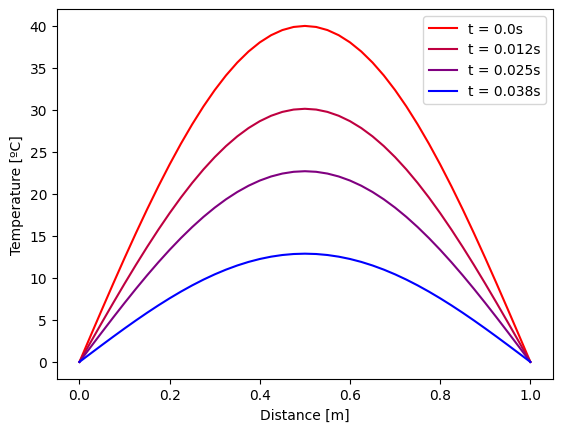

In [4]:
diffusion_rate = 1
delta_x = 0.025
delta_t = 0.025
max_x = 1
max_t = 0.1
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
boundary_conditions = [0, 0]
initial_conditions = 40 * np.sin(np.pi * x)

T = np.zeros((x.size, t.size))
T[0, :] = boundary_conditions[0]
T[-1, :] = boundary_conditions[1]
T[:, 0] = initial_conditions

factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):
    for i in range(1, x.size - 1):
        T[i , n + 1] = factor * T[i - 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i + 1, n]

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
for idx, n in enumerate(t):
    if n % plot_every == 0:
        plt.plot(x, T[:, idx], color = [R[int(n / plot_every)], G, B[int(n / plot_every)]])
plt.legend([f"t = {t_value}s" for t_value in np.round(np.arange(0, max_t + plot_every, plot_every), 3)])
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [ºC]")
plt.savefig("plots_presentation/heat_equation_dyrichlet_middle.png")
plt.show()

### Both extremes heated at different temperatures, middle at 0ºC

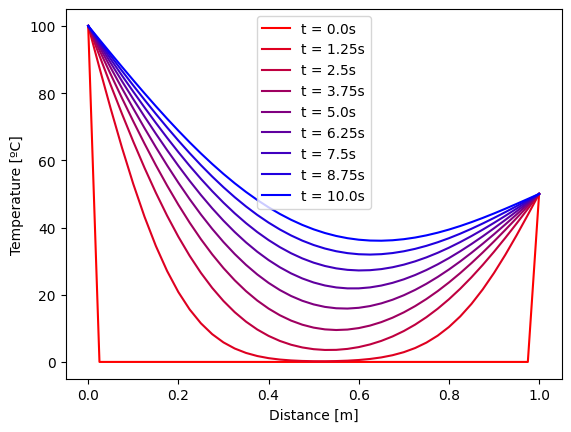

In [223]:
diffusion_rate = 0.01
delta_x = 0.025
delta_t = 0.025
max_x = 1
max_t = 10
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
boundary_conditions = [100, 50]
# initial_conditions = None

T = np.zeros((x.size, t.size))
T[0, :] = boundary_conditions[0]
T[-1, :] = boundary_conditions[1]
# T[:, 0] = initial_conditions

factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):
    for i in range(1, x.size - 1):
        T[i , n + 1] = factor * T[i - 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i + 1, n]

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
for idx, n in enumerate(t):
    if n % plot_every == 0:
        plt.plot(x, T[:, idx], color = [R[int(n / plot_every)], G, B[int(n / plot_every)]])
plt.legend([f"t = {t_value}s" for t_value in np.round(np.arange(0, max_t + plot_every, plot_every), 3)])
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [ºC]")
plt.show()

### Non-working example

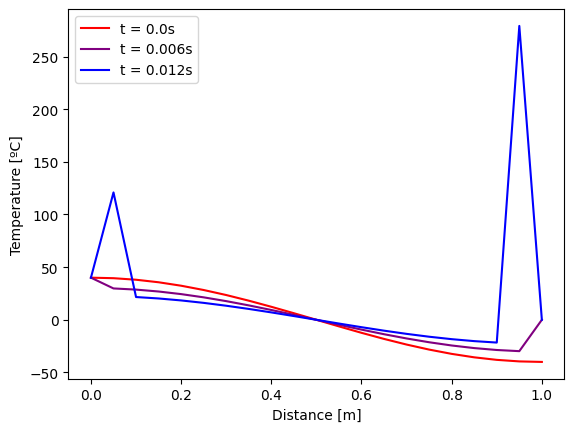

In [228]:
diffusion_rate = 1
delta_x = 0.05
delta_t = 0.025
max_x = 1
max_t = 0.05
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
boundary_conditions = [40, 0]
initial_conditions = 40 * np.cos(np.pi * x)

T = np.zeros((x.size, t.size))
T[0, :] = boundary_conditions[0]
T[-1, :] = boundary_conditions[1]
T[:, 0] = initial_conditions

factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):
    for i in range(1, x.size - 1):
        T[i , n + 1] = factor * T[i - 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i + 1, n]

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
for idx, n in enumerate(t):
    if n % plot_every == 0:
        plt.plot(x, T[:, idx], color = [R[int(n / plot_every)], G, B[int(n / plot_every)]])
plt.legend([f"t = {t_value}s" for t_value in np.round(np.arange(0, max_t + plot_every, plot_every), 3)])
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [ºC]")
plt.show()

## Heat equation (PDE 1-D) with mixed (Dyrichlet + Neumann) boundary conditions
u_t = k * u_xx         in (0,l) x (0,T)

u(0, t) = A     (x = 0)

u_x(l, t) = B     (x = l)

u(x, 0) = u_0(x)

### Left: Dyrichlet, Right: Neumann

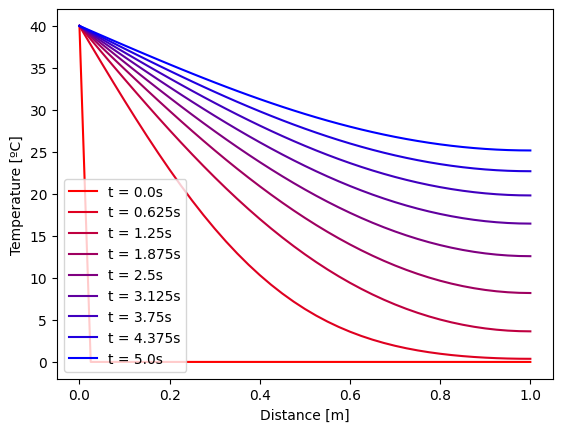

In [17]:
# Source: https://stackoverflow.com/questions/49463985/solving-heat-equation-with-python-numpy
# https://math.stackexchange.com/questions/2706701/neumann-boundary-conditions-in-finite-difference
diffusion_rate = 0.1
delta_x = 0.025
delta_t = 0.0025
max_x = 1
max_t = 5
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
boundary_conditions = [40, 0]
# initial_conditions = 40 * np.sin(np.pi * x)

T = np.zeros((x.size, t.size))
T[0, :] = boundary_conditions[0]
# T[-1, :] = boundary_conditions[1]
# T[:, 0] = initial_conditions

factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):
    for i in range(1, x.size - 1):
        T[i , n + 1] = factor * T[i - 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i + 1, n]
    i = x.size - 1
    T[i , n + 1] = factor * T[i - 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i - 1, n]

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
for idx, n in enumerate(t):
    if n % plot_every == 0:
        plt.plot(x, T[:, idx], color = [R[int(n / plot_every)], G, B[int(n / plot_every)]])
plt.legend([f"t = {t_value}s" for t_value in np.round(np.arange(0, max_t + plot_every, plot_every), 3)])
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [ºC]")
plt.savefig("plots_presentation/heat_equation_right_neumann_bc.png")
plt.show()

### Same but without right Neumann BC (both sides Dyrichlet)

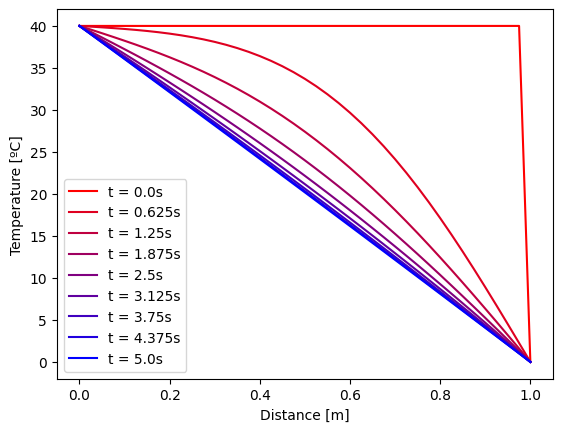

In [16]:
diffusion_rate = 0.1
delta_x = 0.025
delta_t = 0.0025
max_x = 1
max_t = 5
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
boundary_conditions = [40, 0]
initial_conditions = 40
T = np.zeros((x.size, t.size))
T[:, 0] = initial_conditions
T[0, :] = boundary_conditions[0]
T[-1, :] = boundary_conditions[1]


factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):
    for i in range(1, x.size - 1):
        T[i , n + 1] = factor * T[i - 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i + 1, n]

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
for idx, n in enumerate(t):
    if n % plot_every == 0:
        plt.plot(x, T[:, idx], color = [R[int(n / plot_every)], G, B[int(n / plot_every)]])
plt.legend([f"t = {t_value}s" for t_value in np.round(np.arange(0, max_t + plot_every, plot_every), 3)])
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [ºC]")
plt.savefig("plots_presentation/heat_equation_both_dyrichlet_bc.png")
plt.show()

### Left: Neumann, Right: Dyrichlet

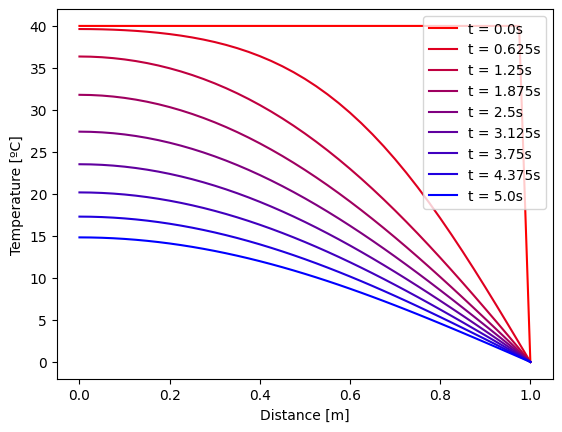

In [18]:
diffusion_rate = 0.1
delta_x = 0.025
delta_t = 0.0025
max_x = 1
max_t = 5
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
boundary_conditions = [40, 0]
initial_conditions = 40

T = np.zeros((x.size, t.size))
T[:, 0] = initial_conditions
T[0, :] = boundary_conditions[0]
T[-1, :] = boundary_conditions[1]

factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):
    for i in range(1, x.size - 1):
        T[i , n + 1] = factor * T[i - 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i + 1, n]
    i = 0
    T[i , n + 1] = factor * T[i + 1, n] \
                        + (1 - 2 * factor) * T[i, n] \
                        + factor * T[i + 1, n]

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
for idx, n in enumerate(t):
    if n % plot_every == 0:
        plt.plot(x, T[:, idx], color = [R[int(n / plot_every)], G, B[int(n / plot_every)]])
plt.legend([f"t = {t_value}s" for t_value in np.round(np.arange(0, max_t + plot_every, plot_every), 3)])
plt.xlabel("Distance [m]")
plt.ylabel("Temperature [ºC]")
plt.savefig("plots_presentation/heat_equation_left_neumann_bc.png")
plt.show()